# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Display Max Columns Rows

In [125]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [35]:
# Configurar pandas para exibir colunas inteiras
pd.set_option('display.max_colwidth', None)

In [3]:
# Configurar pandas para exibir colunas inteiras
pd.reset_option('display.max_colwidth', None)

# Modelo para prever o desempenho do Aluno em Variaveis Educacionais e Socioeconomicas

In [10]:
df_ml = pd.read_csv('dataframe/DF_MODELO.csv', sep=';')
df_pede = pd.read_csv('dataframe/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')
TbAlunoTurma = pd.read_csv('dataframe/TbAlunoTurma.csv', sep=',')
TbMotivoInativacao = pd.read_csv('dataframe/TbMotivoInativacao.csv', sep=',')

In [11]:
TbMotivoInativacao

,IdMotivoInativacao,MotivoInativacao
0,1,Desinteresse / Falta de retorno
1,2,Falta de retorno as nossas tentativas de contato
2,4,Conflito com horário escolar / período integral
3,5,Mudou de bairro/cidade/distância
4,6,Não se adaptou as aulas/não acompanhou
5,7,Outras prioridades/trabalho
6,8,Conhecimento acima da fase atual
7,9,Sem condição financeira para o transporte público
8,10,Sem responsável p/ levar a criança até a unidade
9,11,Idade incompatível com a fase atual


In [12]:
TbAlunoTurma['IdMotivoInativacao'].value_counts(sort='IdMotivoInativacao')


IdMotivoInativacao
2.0     335
5.0     313
7.0     259
8.0     183
1.0     144
4.0     136
10.0    111
15.0     78
14.0     63
6.0      59
9.0      45
16.0     20
17.0     15
13.0      9
11.0      7
18.0      3
12.0      1
Name: count, dtype: int64

In [28]:
df_ml 

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,IdAluno,Total_Presente,Total_Falta,Total_Justificada
0,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Sem Recomendacao,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),7,26.0,0.0,1.0
1,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Promovido de Fase,Não,Não,7.625002,5.0,Fase 6 (2º EM),10,29.0,0.0,3.0
2,Escola Pública,ALUNO-11,8,0,0A,Sim,9.712504,A,Topázio,Seu destaque em 2020: A sua boa entrega das li...,...,Sem Recomendacao,Não,Sim,9.500010,5.0,Fase 2 (5º e 6º ano),13,26.0,0.0,1.0
3,Escola Pública,ALUNO-17,13,2,1G,Não,7.766252,B,Ametista,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Sem Recomendacao,Não,Não,7.500000,5.0,Fase 3 (7º e 8º ano),19,11.0,0.0,16.0
4,Escola Pública,ALUNO-18,14,3,3E,Não,7.205558,C,Ágata,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Promovido de Fase + Bolsa,Sim,Não,7.249998,5.0,Fase 6 (2º EM),20,26.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,Escola Pública,ALUNO-1323,10,1,1N,Não,8.049169,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Sem Recomendacao,Não,Não,7.055557,5.0,Fase 3 (7º e 8º ano),1333,6.0,0.0,145.0
310,Escola Pública,ALUNO-1324,10,2,1K,Não,8.000835,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Sem Recomendacao,Não,Não,7.222220,5.0,Fase 3 (7º e 8º ano),1334,8.0,2.0,155.0
311,Escola Pública,ALUNO-1338,10,1,1D,Sim,8.332503,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Sem Recomendacao,Não,Não,7.499997,5.0,Fase 3 (7º e 8º ano),1348,1.0,1.0,132.0
312,Escola Pública,ALUNO-1343,11,2,2M,Não,5.841667,D,Quartzo,Seu destaque em 2020: A sua boa entrega das li...,...,Sem Recomendacao,Não,Não,7.444443,5.0,Fase 4 (9º ano),1353,0.0,7.0,130.0


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Carregar o dataset
df = df_ml  # Supondo que o dataframe limpo já foi carregado anteriormente

# Atualizando a lista de features para incluir as novas variáveis categóricas
features = [
    'INSTITUICAO_ENSINO_ALUNO_2020', 'BOLSISTA_2022', 'IDADE_ALUNO_2020', 'ANO_INGRESSO_2022', 'PEDRA_2022',
    'FASE_2022', 'NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'PONTO_VIRADA_2022',
    'IEG_2022', 'IPS_2022', 'IAA_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022',
    'DESTAQUE_IEG_2020','DESTAQUE_IDA_2020','DESTAQUE_IPV_2020',
    'REC_EQUIPE_1_2021','REC_EQUIPE_2_2021','REC_EQUIPE_3_2021','REC_EQUIPE_4_2021',
    'REC_AVA_1_2022','REC_AVA_2_2022','REC_AVA_3_2022','REC_AVA_4_2022'
]

X = df[features]
y = df['INDE_2022']  # Variável target

# Definir o pré-processamento para variáveis numéricas e categóricas
numeric_features = ['IDADE_ALUNO_2020', 'ANO_INGRESSO_2022', 'QTD_AVAL_2022', 'IEG_2022', 'IPS_2022', 
                    'IAA_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022', 'FASE_2022']
categorical_features = ['INSTITUICAO_ENSINO_ALUNO_2020', 'BOLSISTA_2022', 'PEDRA_2022','NOTA_PORT_2022', 
                        'NOTA_MAT_2022', 'NOTA_ING_2022', 'PONTO_VIRADA_2022', 'DESTAQUE_IEG_2020','DESTAQUE_IDA_2020',
                        'DESTAQUE_IPV_2020','REC_EQUIPE_1_2021','REC_EQUIPE_2_2021','REC_EQUIPE_3_2021',
                        'REC_EQUIPE_4_2021','REC_AVA_1_2022','REC_AVA_2_2022','REC_AVA_3_2022','REC_AVA_4_2022']

# Pipeline de pré-processamento para variáveis numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Normalizar os dados numéricos
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar o transformador com ambas as colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pré-processar os dados
X_processed = preprocessor.fit_transform(X)

# Função para construir o modelo com regularização e dropout controlado
def build_model(optimizer='adam', dropout_rate=0.2, l2_reg=0.001):
    model = Sequential()
    model.add(Dense(64, input_dim=X_processed.shape[1], activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(dropout_rate))  # Dropout ajustado
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Saída única para regressão

    # Compilar o modelo com o otimizador escolhido
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Definir função para realizar a validação cruzada (cross-validation)
def cross_validate_model(X, y, optimizer, dropout_rate, l2_reg, epochs=100, batch_size=32, patience=10):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    val_losses = []
    val_r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Criar o modelo
        model = build_model(optimizer=optimizer, dropout_rate=dropout_rate, l2_reg=l2_reg)

        # Early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

        # Treinar o modelo
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                  validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

        # Avaliar o modelo nos dados de validação
        val_predictions = model.predict(X_val)
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        val_r2 = r2_score(y_val, val_predictions)
        
        val_losses.append(val_rmse)
        val_r2_scores.append(val_r2)

    avg_rmse = np.mean(val_losses)
    avg_r2 = np.mean(val_r2_scores)

    print(f"Avaliação do modelo: \nMédia RMSE: {avg_rmse}, \nMédia R²: {avg_r2}")
    return avg_rmse, avg_r2

# Testar diferentes otimizadores, taxas de dropout e regularização
results = []

optimizers = ['adam', 'rmsprop', 'sgd']
dropout_rates = [0.2, 0.3]
l2_regs = [0.001, 0.0001]

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        for l2_reg in l2_regs:
            print(f"Testando com otimizador: {optimizer}, dropout: {dropout_rate}, L2 regularização: {l2_reg}")
            rmse, r2 = cross_validate_model(X_processed, y.values, optimizer=optimizer, 
                                            dropout_rate=dropout_rate, l2_reg=l2_reg, epochs=100, batch_size=32, patience=10)
            results.append((optimizer, dropout_rate, l2_reg, rmse, r2))

# Exibir os resultados
for result in results:
    optimizer, dropout_rate, l2_reg, rmse, r2 = result
    print(f"Otimizador: {optimizer}, Dropout: {dropout_rate}, L2 Regularização: {l2_reg} -> RMSE: {rmse}, R²: {r2}")


Testando com otimizador: adam, dropout: 0.2, L2 regularização: 0.001
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 51.0484 - val_loss: 40.5668
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.8266 - val_loss: 31.7434
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.6230 - val_loss: 21.9494
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.5906 - val_loss: 11.7501
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.8140 - val_loss: 3.9076
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8257 - val_loss: 1.4976
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4476 - val_loss: 1.6349
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.9918 - val_loss: 1.2963
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0270 - val_loss: 1.4181
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8953 - val_loss: 1.5291
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6684 - val_loss: 1.4113
Ep

Com variaveis de feedback   'DESTAQUE_IEG_2020','DESTAQUE_IDA_2020','DESTAQUE_IPV_2020',
                            'REC_EQUIPE_1_2021','REC_EQUIPE_2_2021','REC_EQUIPE_3_2021','REC_EQUIPE_4_2021',
                            'REC_AVA_1_2022','REC_AVA_2_2022','REC_AVA_3_2022','REC_AVA_4_2022'

                            

Com faltas 'Total_Presente', 'Total_Falta', 'Total_Justificada'
Otimizador: adam, Dropout: 0.2, L2 Regularização: 0.001 -> RMSE: 0.40714448472337345, R²: 0.8539489508905909
Otimizador: adam, Dropout: 0.2, L2 Regularização: 0.0001 -> RMSE: 0.4338204027548283, R²: 0.8352886958002148
Otimizador: adam, Dropout: 0.3, L2 Regularização: 0.001 -> RMSE: 0.49488060116829236, R²: 0.7873463706144564
Otimizador: adam, Dropout: 0.3, L2 Regularização: 0.0001 -> RMSE: 0.473960094944582, R²: 0.8022025271192481
Otimizador: rmsprop, Dropout: 0.2, L2 Regularização: 0.001 -> RMSE: 0.3334231579573554, R²: 0.9040143034485268
Otimizador: rmsprop, Dropout: 0.2, L2 Regularização: 0.0001 -> RMSE: 0.323621213836711, R²: 0.909245956148304
Otimizador: rmsprop, Dropout: 0.3, L2 Regularização: 0.001 -> RMSE: 0.39307204007281654, R²: 0.8638036514103016
Otimizador: rmsprop, Dropout: 0.3, L2 Regularização: 0.0001 -> RMSE: 0.36701347184713884, R²: 0.8848559147061581
Otimizador: sgd, Dropout: 0.2, L2 Regularização: 0.001 -> RMSE: 0.2646290309975473, R²: 0.9396890341061248
Otimizador: sgd, Dropout: 0.2, L2 Regularização: 0.0001 -> RMSE: 0.25081833792366004, R²: 0.9464269433351653
Otimizador: sgd, Dropout: 0.3, L2 Regularização: 0.001 -> RMSE: 0.2677757466148366, R²: 0.9376245284456077
Otimizador: sgd, Dropout: 0.3, L2 Regularização: 0.0001 -> RMSE: 0.27139683894961386, R²: 0.9370992084266498

Sem faltas
Otimizador: adam, Dropout: 0.2, L2 Regularização: 0.001 -> RMSE: 0.4484033346361276, R²: 0.8252833961872771
Otimizador: adam, Dropout: 0.2, L2 Regularização: 0.0001 -> RMSE: 0.3903090708872002, R²: 0.8678847862137171
Otimizador: adam, Dropout: 0.3, L2 Regularização: 0.001 -> RMSE: 0.44405017522462176, R²: 0.8241008882183006
Otimizador: adam, Dropout: 0.3, L2 Regularização: 0.0001 -> RMSE: 0.42339860012419317, R²: 0.8411294181805561
Otimizador: rmsprop, Dropout: 0.2, L2 Regularização: 0.001 -> RMSE: 0.31938681223498727, R²: 0.9119420605714383
Otimizador: rmsprop, Dropout: 0.2, L2 Regularização: 0.0001 -> RMSE: 0.3403352737404363, R²: 0.896831876154678
Otimizador: rmsprop, Dropout: 0.3, L2 Regularização: 0.001 -> RMSE: 0.3844632957444444, R²: 0.8659118556513132
Otimizador: rmsprop, Dropout: 0.3, L2 Regularização: 0.0001 -> RMSE: 0.3496212030491388, R²: 0.8909173343742516
Otimizador: sgd, Dropout: 0.2, L2 Regularização: 0.001 -> RMSE: 0.24782106789909455, R²: 0.9457712189644418
Otimizador: sgd, Dropout: 0.2, L2 Regularização: 0.0001 -> RMSE: 0.257491621310589, R²: 0.9405020730503827
Otimizador: sgd, Dropout: 0.3, L2 Regularização: 0.001 -> RMSE: 0.25666081509348027, R²: 0.9439422409429499
Otimizador: sgd, Dropout: 0.3, L2 Regularização: 0.0001 -> RMSE: 0.25215957182634313, R²: 0.9447142219439832

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Carregar o dataset
df = df_ml  # Supondo que o dataframe limpo já foi carregado anteriormente

# Atualizando a lista de features para incluir as novas variáveis categóricas
features = [
    'INSTITUICAO_ENSINO_ALUNO_2020', 'BOLSISTA_2022', 'IDADE_ALUNO_2020', 'ANO_INGRESSO_2022', 'PEDRA_2022',
    'FASE_2022', 'NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'PONTO_VIRADA_2022',
    'IEG_2022', 'IPS_2022', 'IAA_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022'
]

X = df[features]
y = df['INDE_2022']  # Variável target

# Definir o pré-processamento para variáveis numéricas e categóricas
numeric_features = ['IDADE_ALUNO_2020', 'ANO_INGRESSO_2022', 'QTD_AVAL_2022', 'IEG_2022', 'IPS_2022', 
                    'IAA_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022', 'FASE_2022']
categorical_features = ['INSTITUICAO_ENSINO_ALUNO_2020', 'BOLSISTA_2022', 'PEDRA_2022','NOTA_PORT_2022', 
                        'NOTA_MAT_2022', 'NOTA_ING_2022', 'PONTO_VIRADA_2022'
                        ]

# Pipeline de pré-processamento para variáveis numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Normalizar os dados numéricos
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar o transformador com ambas as colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pré-processar os dados
X_processed = preprocessor.fit_transform(X)

# Função para construir o modelo com regularização e dropout controlado
def build_model(optimizer='sgd', dropout_rate=0.3, l2_reg=0.0001):
    model = Sequential()
    model.add(Dense(64, input_dim=X_processed.shape[1], activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(dropout_rate))  # Dropout ajustado
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Saída única para regressão

    # Compilar o modelo com o otimizador SGD
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Definir função para realizar a validação cruzada (cross-validation)
def cross_validate_model(X, y, epochs=100, batch_size=32, patience=10):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    val_rmse_scores = []
    val_mae_scores = []
    val_mape_scores = []
    val_r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Criar o modelo
        model = build_model()

        # Early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

        # Treinar o modelo
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                  validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

        # Avaliar o modelo nos dados de validação
        val_predictions = model.predict(X_val)
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        val_mae = mean_absolute_error(y_val, val_predictions)
        val_mape = np.mean(np.abs((y_val - val_predictions.flatten()) / y_val)) * 100
        val_r2 = r2_score(y_val, val_predictions)
        
        val_rmse_scores.append(val_rmse)
        val_mae_scores.append(val_mae)
        val_mape_scores.append(val_mape)
        val_r2_scores.append(val_r2)

    avg_rmse = np.mean(val_rmse_scores)
    avg_mae = np.mean(val_mae_scores)
    avg_mape = np.mean(val_mape_scores)
    avg_r2 = np.mean(val_r2_scores)

    print(f"Avaliação do modelo: \nMédia RMSE: {avg_rmse}, \nMédia MAE: {avg_mae}, \nMédia MAPE: {avg_mape}%, \nMédia R²: {avg_r2}")
    return avg_rmse, avg_mae, avg_mape, avg_r2

# Avaliar o modelo com os parâmetros já definidos
rmse, mae, mape, r2 = cross_validate_model(X_processed, y.values, epochs=100, batch_size=32, patience=10)

# Exibir os resultados
print(f"Resultados: \nRMSE: {rmse}, \nMAE: {mae}, \nMAPE: {mape}%, \nR²: {r2}")


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 36.6298 - val_loss: 3.8731
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0058 - val_loss: 2.3210
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9511 - val_loss: 2.0733
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0677 - val_loss: 2.3787
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.4371 - val_loss: 3.1422
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9645 - val_loss: 1.9366
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3727 - val_loss: 2.3618
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3672 - val_loss: 1.5911
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8280 - val_loss: 1.6417
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6345 - val_loss: 1.9091
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4611 - val_loss: 1.8793
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4748 - val_lo

Com variaveis de feedback   'DESTAQUE_IEG_2020','DESTAQUE_IDA_2020','DESTAQUE_IPV_2020',
                            'REC_EQUIPE_1_2021','REC_EQUIPE_2_2021','REC_EQUIPE_3_2021','REC_EQUIPE_4_2021',
                            'REC_AVA_1_2022','REC_AVA_2_2022','REC_AVA_3_2022','REC_AVA_4_2022'
RMSE: 0.2786926864934659, 
MAE: 0.2022143261124895, 
MAPE: 3.1733747152406107%, 
R²: 0.932133287873188
                            

com faltas 'Total_Presente', 'Total_Falta', 'Total_Justificada'
RMSE: 0.2543452709024562, 
MAE: 0.1979104652219463, 
MAPE: 3.0151110423993743%, 
R²: 0.942523300937585

sem faltas
RMSE: 0.24735983854628468, 
MAE: 0.19163201879946612, 
MAPE: 2.91235461709094%, 
R²: 0.946225777818712

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


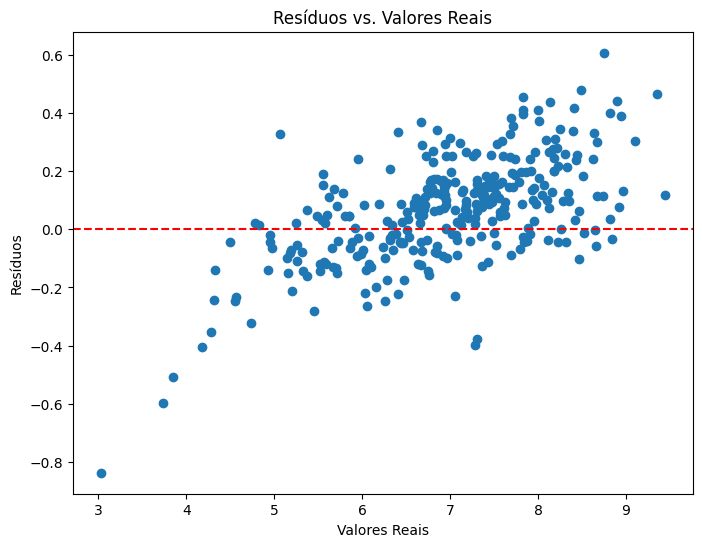

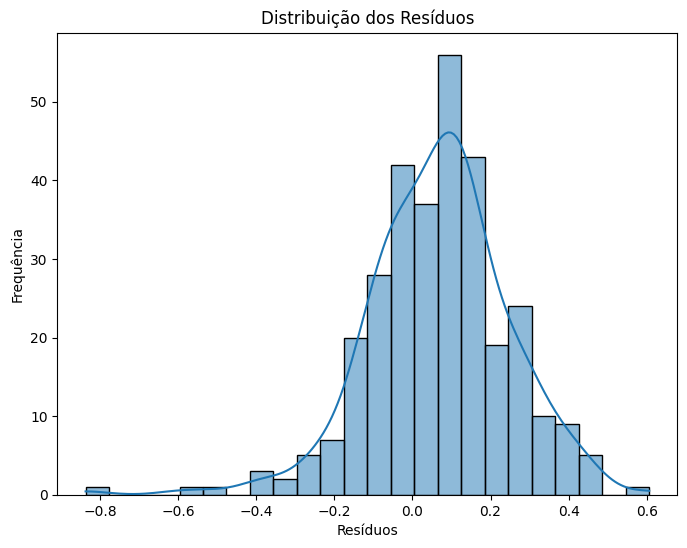

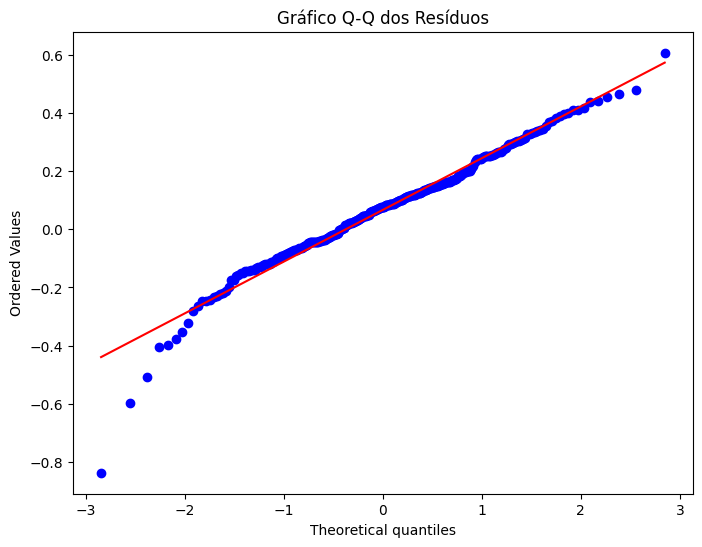

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obter os resíduos (diferença entre os valores reais e previstos)
model = build_model()  # Usar o melhor modelo
model.fit(X_processed, y.values, epochs=100, batch_size=32, verbose=0)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_processed)

# Calcular os resíduos
residuals = y.values - y_pred.flatten()

# 1. Gráfico de Resíduos vs. Valores Reais
plt.figure(figsize=(8, 6))
plt.scatter(y.values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs. Valores Reais")
plt.xlabel("Valores Reais")
plt.ylabel("Resíduos")
plt.show()

# 2. Histograma dos Resíduos
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

# 3. Gráfico Q-Q
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Gráfico Q-Q dos Resíduos")
plt.show()


O modelo para prever o desempenho do aluno com base em variáveis educacionais e socioeconômicas mostrou um bom desempenho, especialmente no que diz respeito aos valores de RMSE, MAE, MAPE e R². O R² em particular, indicando uma capacidade do modelo explicar cerca de 94% da variabilidade dos dados de teste, sugere que o modelo é bastante eficaz na predição do desempenho dos alunos.

Avaliação da Quantidade de Variáveis
A quantidade e o tipo de variáveis utilizadas parecem adequadas, dada a alta performance do modelo. As variáveis incluem medidas diretas de desempenho acadêmico, engajamento e outros indicadores psicossociais e pedagógicos, que são essenciais para um modelo preditivo neste contexto.

Sugestões para Melhoria com Novas Variáveis
Variáveis Contextuais Adicionais:

Fatores Familiares: Informações sobre o ambiente familiar, como o nível de educação dos pais, a situação de emprego e a estrutura familiar, poderiam fornecer insights adicionais sobre o suporte e as expectativas em relação à educação do aluno.
Acesso a Recursos: Informações sobre o acesso do aluno a recursos educacionais fora da escola, como tutoria privada, acesso à internet e recursos de aprendizagem em casa, podem influenciar significativamente o desempenho.
Dados Comportamentais:

Assiduidade: A frequência e regularidade com que os alunos assistem às aulas podem ser indicadores importantes do engajamento e do desempenho futuros.
Participação em Atividades Extracurriculares: Envolvimento em esportes, clubes de arte, música e outras atividades extracurriculares pode estar correlacionado com maior engajamento e melhores resultados educacionais.
Variáveis de Saúde Psicológica:

Bem-Estar Mental: Indicadores do estado de saúde mental do aluno, como escalas de estresse ou ansiedade, podem ser preditores úteis de desempenho acadêmico, dado o impacto da saúde mental na capacidade de aprendizado.
Feedback dos Professores:

Avaliações Qualitativas: Comentários e observações dos professores sobre o comportamento em sala de aula e o potencial de aprendizado do aluno poderiam ser codificados e usados como parte do modelo preditivo.
Conclusão
Embora o modelo atual seja robusto, a inclusão de variáveis adicionais relacionadas ao ambiente socioeconômico e ao bem-estar do aluno poderia potencialmente oferecer uma visão mais holística e melhorar a precisão das previsões. Também é recomendável continuar monitorando a distribuição dos resíduos para garantir que o modelo não incorra em erros sistemáticos e seja generalizável em diferentes conjuntos de dados.

Dados Comportamentais:

Assiduidade: A frequência e regularidade com que os alunos assistem às aulas podem ser indicadores importantes do engajamento e do desempenho futuros.

Variáveis de Saúde Psicológica:

Bem-Estar Mental: Indicadores do estado de saúde mental do aluno, como escalas de estresse ou ansiedade, podem ser preditores úteis de desempenho acadêmico, dado o impacto da saúde mental na capacidade de aprendizado.

Feedback dos Professores:

Avaliações Qualitativas: Comentários e observações dos professores sobre o comportamento em sala de aula e o potencial de aprendizado do aluno poderiam ser codificados e usados como parte do modelo preditivo.

In [37]:
df_ml[['IdAluno',
       'DESTAQUE_IEG_2020','DESTAQUE_IDA_2020','DESTAQUE_IPV_2020',
       
       'REC_EQUIPE_1_2021','REC_EQUIPE_2_2021','REC_EQUIPE_3_2021','REC_EQUIPE_4_2021',
       
       'REC_AVA_1_2022','REC_AVA_2_2022','REC_AVA_3_2022','REC_AVA_4_2022']].value_counts()

IdAluno  DESTAQUE_IEG_2020                                                    DESTAQUE_IDA_2020                                                   DESTAQUE_IPV_2020                                                          REC_EQUIPE_1_2021          REC_EQUIPE_2_2021          REC_EQUIPE_3_2021          REC_EQUIPE_4_2021  REC_AVA_1_2022           REC_AVA_2_2022         REC_AVA_3_2022           REC_AVA_4_2022           
7        Seu destaque em 2020: A sua boa entrega das lições de casa.          Seu destaque em 2020: As suas boas notas na Passos Mágicos.         Seu destaque em 2020: A sua boa integração aos Princípios Passos Mágicos.  Promovido de Fase          Mantido na Fase atual      Mantido na Fase atual      Não avaliado       Mantido na Fase atual    Promovido de Fase      Mantido na Fase atual    Sem Recomendacao             1
867      Seu destaque em 2020: A sua boa entrega das lições de casa.          Seu destaque em 2020: As suas boas notas na Passos Mágicos.         Ponto a m